In [178]:
df = pd.read_csv("file_class_full.csv")
df = df.sample(100000)
# Create the 'best_match' column
df['best_match'] = df.drop(columns=['name']).idxmax(axis=1)
df.head(5)

,name,article,audited financial statements,aum,capital committed invested,cco notes,compliance other,compliance business continuity manual,conference call,conference meeting notes,...,risk management policy,risk report,service provider information,side letter,tax information,term sheet,unaudited financial statements,valuation policy,wire instructions,best_match
313299,wires,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,wire instructions
180675,startcase.js,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,article
117267,k-1s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,article
212650,ic meeting - manager performance report - 7.6....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,conference meeting notes
426588,bloomberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,article


In [179]:
df['best_match'] = df['best_match'].replace('article', 'unknown')
df.head(5)

,name,article,audited financial statements,aum,capital committed invested,cco notes,compliance other,compliance business continuity manual,conference call,conference meeting notes,...,risk management policy,risk report,service provider information,side letter,tax information,term sheet,unaudited financial statements,valuation policy,wire instructions,best_match
313299,wires,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,wire instructions
180675,startcase.js,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
117267,k-1s,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown
212650,ic meeting - manager performance report - 7.6....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,conference meeting notes
426588,bloomberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unknown


In [180]:
# Split the data into labeled and unlabeled datasets
labeled_df = df[df['best_match'] != 'unknown']
unlabeled_df = df[df['best_match'] == 'unknown']

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.sparse import hstack

# Create a copy of labeled_df to avoid SettingWithCopyWarning
labeled_df = labeled_df.copy()

# Step 1: Extract file extensions from the 'name' column
labeled_df['extension'] = labeled_df['name'].str.extract(r'\.([^.]+)$')  # Extract extension after the last dot
labeled_df['extension'] = labeled_df['extension'].fillna('no_ext')  # Handle missing extensions

# Step 2: Vectorize the file names using TF-IDF
name_vectorizer = TfidfVectorizer(stop_words='english')
X_name = name_vectorizer.fit_transform(labeled_df['name'])  # Vectorize file names

# Step 3: Vectorize the file extensions
ext_vectorizer = DictVectorizer(sparse=True)
X_ext = ext_vectorizer.fit_transform(labeled_df[['extension']].to_dict(orient='records'))  # Vectorize extensions

# Step 4: Combine the two feature matrices
X_combined = hstack([X_name, X_ext])

# Step 5: Prepare labels
y = labeled_df['best_match']  # Labels: the 'best_match' column

# Step 6: Split the labeled dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Step 7: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Evaluate the model
y_pred = model.predict(X_test)

# Output performance metrics
print(classification_report(y_test, y_pred))


                                        precision    recall  f1-score   support

          audited financial statements       0.97      0.99      0.98       589
                                   aum       1.00      1.00      1.00        40
            capital committed invested       0.97      0.98      0.98       835
                             cco notes       0.98      0.97      0.98       103
 compliance business continuity manual       1.00      0.89      0.94        45
                      compliance other       0.76      0.83      0.79        23
                       conference call       0.90      0.79      0.84       116
              conference meeting notes       0.96      0.97      0.96        91
                         current event       1.00      0.81      0.89        36
                                   ddq       0.97      1.00      0.99        33
                         due diligence       0.98      0.80      0.88        60
                  employee information 

C:\Users\gregory.fatouras\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gregory.fatouras\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gregory.fatouras\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [182]:
from scipy.sparse import hstack

# Step 1: Extract file extensions from the 'name' column in unlabeled_df
unlabeled_df['extension'] = unlabeled_df['name'].str.extract(r'\.([^.]+)$')  # Extract extension after the last dot
unlabeled_df['extension'] = unlabeled_df['extension'].fillna('no_ext')  # Handle missing extensions

# Step 2: Vectorize the file names using the same TF-IDF vectorizer
X_name_unlabeled = name_vectorizer.transform(unlabeled_df['name'].fillna(''))  # Handle NaN by replacing with empty string

# Step 3: Vectorize the file extensions using the same DictVectorizer
X_ext_unlabeled = ext_vectorizer.transform(unlabeled_df[['extension']].to_dict(orient='records'))

# Step 4: Combine the two feature matrices for the unlabeled data
X_combined_unlabeled = hstack([X_name_unlabeled, X_ext_unlabeled])

# Step 5: Predict the labels for the unlabeled data
predicted_labels = model.predict(X_combined_unlabeled)

# Step 6: Add predictions to the dataframe
unlabeled_df = unlabeled_df.copy()  # Avoid SettingWithCopyWarning
unlabeled_df['best_match'] = predicted_labels

# Step 7: Save the results to a CSV file
output_df = unlabeled_df[['name', 'best_match']]  # Select only relevant columns
output_df.to_csv('predicted_classes.csv', index=False)


C:\Users\gregory.fatouras\AppData\Local\Temp\ipykernel_23776\1658632582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled_df['extension'] = unlabeled_df['name'].str.extract(r'\.([^.]+)$')  # Extract extension after the last dot
C:\Users\gregory.fatouras\AppData\Local\Temp\ipykernel_23776\1658632582.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled_df['extension'] = unlabeled_df['extension'].fillna('no_ext')  # Handle missing extensions


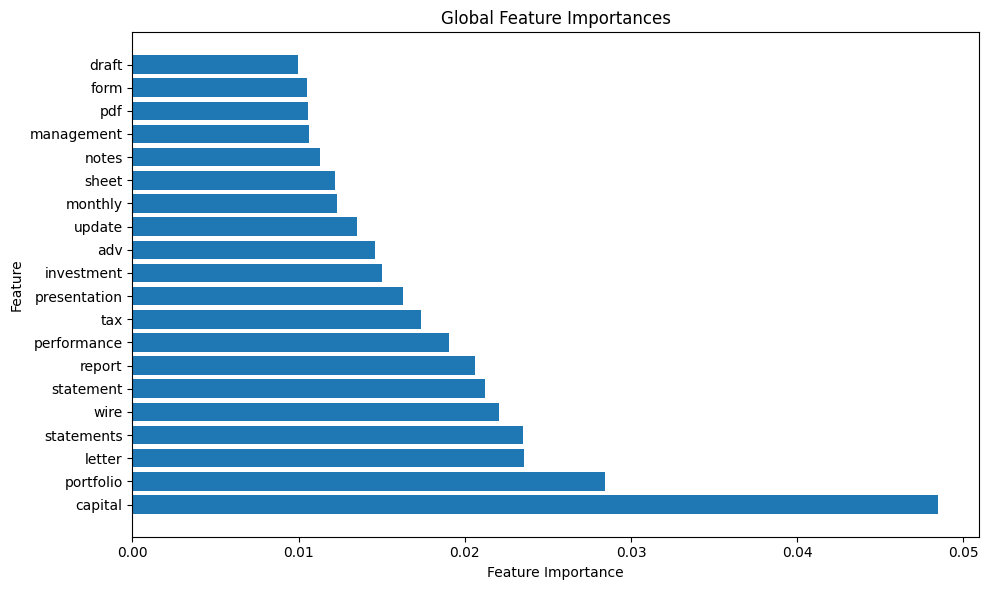

In [183]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get feature importances from the Random Forest model
importances = model.feature_importances_

# Combine feature names from both name and extension vectorizers
name_features = name_vectorizer.get_feature_names_out()
extension_features = ext_vectorizer.get_feature_names_out()
all_features = np.concatenate([name_features, extension_features])

# Sort the features by importance
sorted_idx = np.argsort(importances)[::-1]

# Step 2: Plot the global feature importances
plt.figure(figsize=(10, 6))
plt.barh(np.array(all_features)[sorted_idx][:20], importances[sorted_idx][:20])  # Top 20 features
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Global Feature Importances')
plt.tight_layout()
plt.show()